In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
import random

In [2]:
# Save the provided records as a CSV file
data = """Date,Product,Units Sold,Revenue,Category
2025-01-01,Laptop,10,15000.00,Electronics
2025-01-02,Mobile,5,2500.00,Electronics
2025-02-03,Headphones,8,1200.00,Accessories
2025-02-04,Tablet,7,4900.00,Electronics
2025-03-05,Monitor,3,3600.00,Electronics
2025-04-06,Smartwatch,6,3600.00,Electronics
2025-04-07,Laptop,4,8000.00,Electronics
2025-04-08,Keyboard,9,450.00,Accessories
2025-04-09,Camera,2,2400.00,Electronics
2025-05-10,Printer,15,6750.00,Electronics
2025-05-11,Mouse,10,250.00,Accessories
2025-06-12,,12,3000.00,Electronics
2025-07-13,Mobile,15,7500.00,Unknown
2025-07-14,Headphones,6,-1200.00,Accessories
2025-07-15,Tablet,10,6000.00,Electronics
2025-08-16,Monitor,,1800.00,Electronics
2025-08-17,Laptop,5,7500.00,
2025-08-18,Smartwatch,3,1800.00,Electronics
2025-09-19,Keyboard,12,480.00,Accessories
2025-09-20,Mobile,-5,1250.00,Electronics
2025-09-21,Laptop,8,12000.00,Electronics
2025-09-22,Printer,4,,Electronics
2025-10-23,Mouse,7,175.00,Accessories
2025-10-24,Laptop,9,13500.00,Electronics
2025-11-25,Tablet,8,4800.00,Electronics
2025-11-26,Headphones,10,1500.00,Accessories
2025-11-27,Camera,4,4800.00,Electronics
2025-12-28,Smartwatch,5,3000.00,Electronics
2025-12-29,Mobile,8,4000.00,Unknown
2025-12-30,Laptop,10,15000.00,Electronics
"""

with open("sales_data.csv", "w") as file:
    file.write(data)
print("CSV file 'sales_data.csv' created.")

CSV file 'sales_data.csv' created.


In [3]:
# Load the CSV file
df = pd.read_csv("sales_data.csv")
df.head()

,Date,Product,Units Sold,Revenue,Category
0,2025-01-01,Laptop,10.0,15000.0,Electronics
1,2025-01-02,Mobile,5.0,2500.0,Electronics
2,2025-02-03,Headphones,8.0,1200.0,Accessories
3,2025-02-04,Tablet,7.0,4900.0,Electronics
4,2025-03-05,Monitor,3.0,3600.0,Electronics


In [4]:
df.shape

(30, 5)

In [5]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Handle missing values (fill or drop)
# Example: Fill missing values with a placeholder
df.fillna({"Category": "Unknown"}, inplace=True)


Missing values:
 Date          0
Product       1
Units Sold    1
Revenue       1
Category      1
dtype: int64


In [6]:
df.shape

(30, 5)

## Ensure Date Column is in Correct Datetime Format

In [7]:
# Convert the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
print("Date column converted to datetime.")

Date column converted to datetime.


## Remove Rows with Negative Units Sold or Revenue

In [8]:
df.shape

(30, 5)

In [9]:
# Remove rows where Units Sold or Revenue is negative
df = df[(df['Units Sold'] >= 0) & (df['Revenue'] >= 0)]
print("Negative values removed.")

Negative values removed.


In [10]:
df.shape # 4 items removed

(26, 5)

## Drop missing rows (if product name, units sold and revenue is missing)

In [11]:
df.shape

(26, 5)

In [12]:
# Drop rows where Product, Units Sold, or Revenue is missing
df_cleaned = df.dropna(subset=["Product", "Units Sold", "Revenue"])

In [13]:
df.shape

(26, 5)

## Calculate Total Revenue by Procuct

In [14]:
# Group by Product and calculate total revenue
total_revenue_by_product = df.groupby('Product')['Revenue'].sum()
print("Total Revenue by Product:\n", total_revenue_by_product)

Total Revenue by Product:
 Product
Camera         7200.0
Headphones     2700.0
Keyboard        930.0
Laptop        71000.0
Mobile        14000.0
Monitor        3600.0
Mouse           425.0
Printer        6750.0
Smartwatch     8400.0
Tablet        15700.0
Name: Revenue, dtype: float64


## Calculate Average Units Sold Per Product

In [15]:
# Calculate average units sold per product
average_units_sold = df.groupby('Product')['Units Sold'].mean()
print("Average Units Sold Per Product:\n", average_units_sold)

Average Units Sold Per Product:
 Product
Camera         3.000000
Headphones     9.000000
Keyboard      10.500000
Laptop         7.666667
Mobile         9.333333
Monitor        3.000000
Mouse          8.500000
Printer       15.000000
Smartwatch     4.666667
Tablet         8.333333
Name: Units Sold, dtype: float64


## Identify the Product with the Highest Revenue and Units Sold

In [16]:
# Product with highest revenue
highest_revenue_product = total_revenue_by_product.idxmax()
highest_revenue_value = total_revenue_by_product.max()

# Product with highest units sold
total_units_sold_by_product = df.groupby('Product')['Units Sold'].sum()
highest_units_sold_product = total_units_sold_by_product.idxmax()
highest_units_sold_value = total_units_sold_by_product.max()

print(f"Product with the highest revenue: {highest_revenue_product} (${highest_revenue_value})")
print(f"Product with the highest units sold: {highest_units_sold_product} ({highest_units_sold_value} units)")


Product with the highest revenue: Laptop ($71000.0)
Product with the highest units sold: Laptop (46.0 units)


## Total Revenue by Products

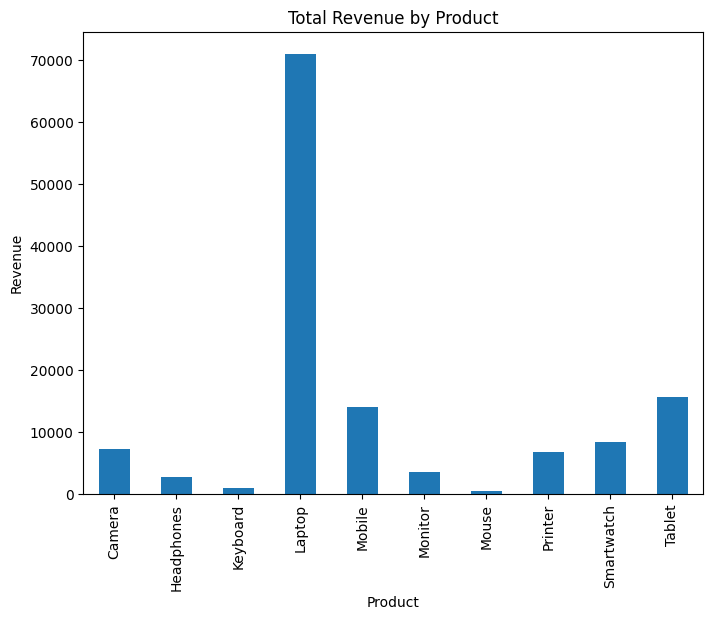

In [17]:
# Bar chart for total revenue by product
total_revenue_by_product.plot(kind='bar', figsize=(8, 6))
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.show()

## Revenue Trend Over Time

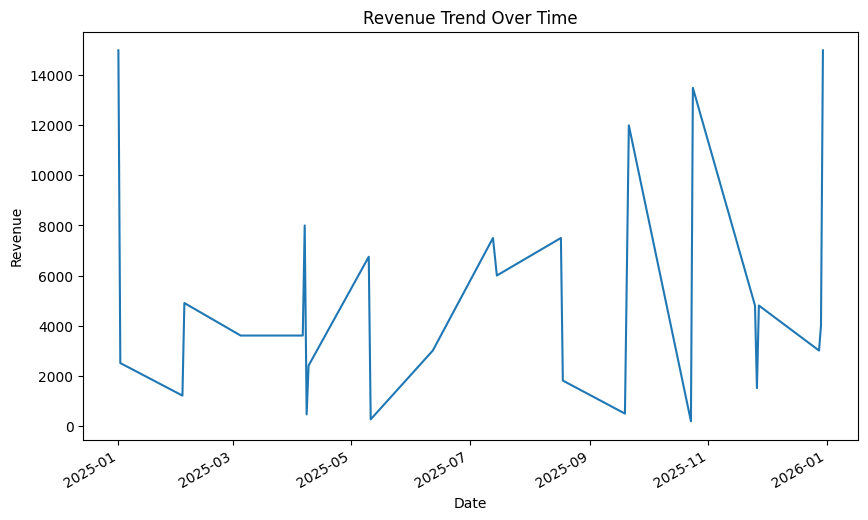

In [18]:
# Line plot for revenue trend
revenue_trend = df.groupby('Date')['Revenue'].sum()
revenue_trend.plot(kind='line', figsize=(10, 6))
plt.title("Revenue Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

## Revenue Distribution across categories

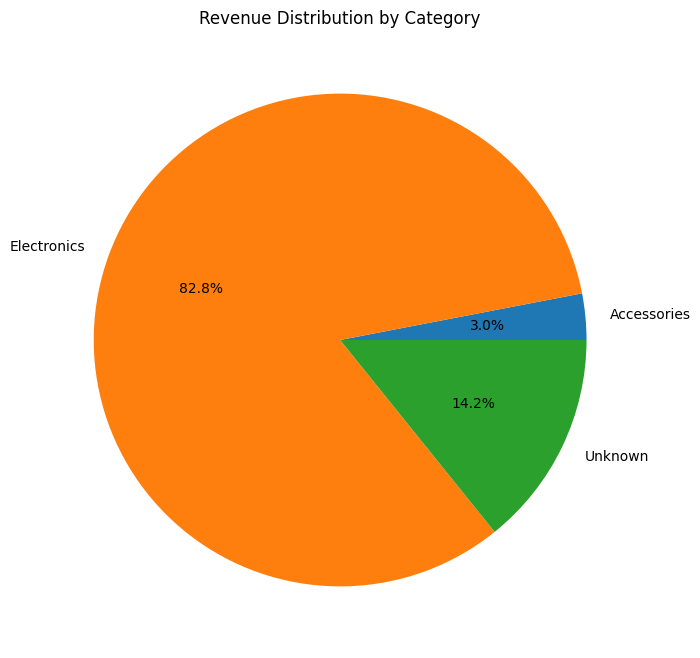

In [19]:
# Pie chart for revenue distribution
revenue_by_category = df.groupby('Category')['Revenue'].sum()
revenue_by_category.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%')
plt.title("Revenue Distribution by Category")
plt.ylabel("")  # Hide the y-axis label
plt.show()

## Growth Rate of Revenue

In [20]:
# Calculate revenue growth rate for each product
df['Month'] = df['Date'].dt.to_period('M')
monthly_revenue = df.groupby(['Month', 'Product'])['Revenue'].sum().unstack()

# Calculate growth rate
growth_rate = ((monthly_revenue.iloc[-1] - monthly_revenue.iloc[0]) / monthly_revenue.iloc[0]) * 100
growth_rate = growth_rate.dropna()  # Drop NaN values caused by missing months
print("Growth Rate of Revenue (%):\n", growth_rate)

# Identify the product(s) with the highest growth rate
highest_growth_product = growth_rate.idxmax()
highest_growth_value = growth_rate.max()
print(f"Product with the highest growth rate: {highest_growth_product} ({highest_growth_value:.2f}%)")


Growth Rate of Revenue (%):
 Product
Laptop     0.0
Mobile    60.0
dtype: float64
Product with the highest growth rate: Mobile (60.00%)
